# Tweets_Fans_TopClubs_Ligue1


In [1]:
import os

os.chdir("C://Users//basti//Google Drive//Thesis_Bast//Code_Thesis")
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\basti\Google Drive\Thesis_Bast\Code_Thesis


In [1]:
from IPython.display import clear_output
clear_output()
import advertools as adv
import pandas as pd
pd.options.display.max_columns = None
import plotly.graph_objects as go
import plotly
import warnings
warnings.filterwarnings("ignore")


I manually got the Twitter handles of each club by searching for them on Twitter. Here are the clubs with the biggest communities, identified during the literature review. 

In [179]:
Marseille = ['#olympiquedemarseille OR #droitaubut OR #forzaom OR #teamom OR #allezom OR #omnation OR #om']
Lyon = ['#ol OR #olympiquelyonnais OR #gones OR #OL OR #teamol']
Paris = ['#psg OR #parissaintgermain OR #PSG_inside OR #icicestparis OR #parissg OR #allezparis']
Monaco = ['#asmonaco OR #AS_Monaco OR #monacounit OR #asmonacofc']
Nantes = ['#FCnantes OR #allezfcnantes OR #teamnantes OR #stadedelabeaujoire OR #alleznantes OR #nantespassion']
Lille = ['#losc OR #lilleosc OR #wearelosc OR #teamlosc OR #lilleolympiquesportingclub OR #allezlelosc']

Later, we will need to map accounts to the club names, so I've created this dictionary, mapping Twitter handles to the club name. 

## Getting the Data

In [31]:
auth_params = {
    'app_key': 'd1vumEybD0TVgu9ymbXHQKLkv',
    'app_secret': 'XLz9UuTAlmMv4JiAYAIaU5BbcjBAxqRAvVU2jO16lyMkDllx9S',
    'oauth_token': '895649658-jgwnVKSSsNQQ9WY2thpYegi7ZljM2dDdR2lb578x',
    'oauth_token_secret': 'RF9aEUKkjhFq6Unj5bVAyfSd0Pydj7IE53VlUqQFhIoJw',
}

adv.twitter.set_auth_params(**auth_params)

Retrieving the data based on the keywords identified above

In [116]:
tweet_om = []

for club in Marseille:
    df = adv.twitter.search(q= Marseille, tweet_mode='extended', count= 3500, lang='en')
    tweet_om.append(df)

tweet_om = pd.concat(tweet_om, sort=False)

tweet_ol = []

for club in Lyon:
    df = adv.twitter.search(q= Lyon, tweet_mode='extended', count= 3500, lang='en')
    tweet_ol.append(df)

tweet_ol = pd.concat(tweet_ol, sort=False )

tweet_psg = []

for club in Paris:
    df = adv.twitter.search(q= Paris, tweet_mode='extended', count= 3500, lang='en')
    tweet_psg.append(df)

tweet_psg = pd.concat(tweet_psg, sort=False)

tweet_asm = []

for club in Monaco:
    df = adv.twitter.search(q= Monaco, tweet_mode='extended', count= 3500, lang='en')
    tweet_asm.append(df)

tweet_asm = pd.concat(tweet_asm, sort=False)

tweet_nantes = []

for club in Nantes:
    df = adv.twitter.search(q= Nantes, tweet_mode='extended', count= 3500, lang='en')
    tweet_nantes.append(df)

tweet_nantes = pd.concat(tweet_nantes, sort=False)

tweet_losc = []

for club in Lille:
    df = adv.twitter.search(q= Lille, tweet_mode='extended', count= 3500, lang='en')
    tweet_losc.append(df)

tweet_losc = pd.concat(tweet_losc, sort=False)



2020-11-08 16:57:42,933 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=None, q=['#olympiquedemarseille OR #droitaubut OR #forzaom OR #teamom OR #allezom OR #omnation'], tweet_mode=extended, lang=en
2020-11-08 16:57:44,753 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=1324802320459354118, q=['#olympiquedemarseille OR #droitaubut OR #forzaom OR #teamom OR #allezom OR #omnation'], tweet_mode=extended, lang=en
2020-11-08 16:57:45,847 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=1323739257706582015, q=['#olympiquedemarseille OR #droitaubut OR #forzaom OR #teamom OR #allezom OR #omnation'], tweet_mode=extended, lang=en
2020-11-08 16:57:46,863 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=1322847108580462592, q=['#olympiquedemarseille OR #droitaubut OR #forzaom OR #teamom OR #allezom OR #omnation'], tweet_mode=extended, lang=en
2020-11-08 16:57:47,637 | INFO | twitter.py:163 | w

2020-11-08 16:58:34,943 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=1322943629812506623, q=['#psg OR #parissaintgermain OR #PSG_inside OR #icicestparis OR #parissg OR #allezparis'], tweet_mode=extended, lang=en
2020-11-08 16:58:36,132 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=1322848329261215743, q=['#psg OR #parissaintgermain OR #PSG_inside OR #icicestparis OR #parissg OR #allezparis'], tweet_mode=extended, lang=en
2020-11-08 16:58:37,423 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=1322694647412641791, q=['#psg OR #parissaintgermain OR #PSG_inside OR #icicestparis OR #parissg OR #allezparis'], tweet_mode=extended, lang=en
2020-11-08 16:58:38,541 | INFO | twitter.py:163 | wrapper | search | Requesting: count=100, max_id=1322656674625236993, q=['#psg OR #parissaintgermain OR #PSG_inside OR #icicestparis OR #parissg OR #allezparis'], tweet_mode=extended, lang=en
2020-11-08 16:58:39,275 | INFO |

In [117]:
tweet_om['club_name']='Marseille'
tweet_ol['club_name']='Lyon'
tweet_psg['club_name']='Paris'
tweet_asm['club_name']='Monaco'
tweet_nantes['club_name']='Nantes'
tweet_losc['club_name']='Lille'

In [118]:
remove_columns = ['tweet_id','tweet_id_str','tweet_truncated','tweet_entities_urls','tweet_entities_symbols','tweet_entities_media', 
          'tweet_metadata','tweet_in_reply_to_status_id','tweet_in_reply_to_status_id_str','tweet_in_reply_to_user_id',
          'tweet_in_reply_to_user_id_str','tweet_in_reply_to_screen_name','tweet_in_reply_to_screen_name','tweet_user',
          'tweet_geo', 'tweet_coordinates','tweet_place','tweet_contributors','tweet_retweeted_status','tweet_is_quote_status',
          'tweet_possibly_sensitive','user_id',
          'user_id_str','user_url','user_entities','user_protected','user_friends_count','user_listed_count','user_utc_offset',
          'user_time_zone','user_geo_enabled','user_verified','user_contributors_enabled','user_is_translator','user_is_translation_enabled',
          'user_profile_background_color','user_profile_background_image_url','user_profile_background_image_url_https','user_profile_background_image_url_https',
          'user_profile_background_tile','user_profile_image_url','user_profile_image_url_https','user_profile_banner_url','user_profile_link_color',
          'user_profile_sidebar_border_color','user_profile_sidebar_fill_color','user_profile_text_color','user_profile_use_background_image',
          'user_has_extended_profile','user_has_extended_profile','user_default_profile','user_default_profile_image','user_following',
          'user_follow_request_sent','user_notifications','user_notifications','user_translator_type','tweet_source_url',"tweet_entities"]


## Merging club tweets into 1 dataframe

In [119]:
all_tweets= tweet_om.append([tweet_ol, tweet_psg, tweet_asm, tweet_nantes, tweet_losc])

In [120]:
print(all_tweets.shape)
all_tweets[::50]

all_tweet = all_tweets.drop(labels =remove_columns, axis=1)

(3939, 82)


In [121]:
all_tweet = all_tweet.drop(['tweet_entities_mentions']== '@sillymickel')


In [180]:
all_tweet

,tweet_created_at,tweet_full_text,tweet_display_text_range,tweet_entities_mentions,tweet_entities_hashtags,tweet_source,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang,tweet_extended_entities,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_quoted_status,user_name,user_screen_name,user_location,user_description,user_followers_count,user_created_at,user_favourites_count,user_statuses_count,user_lang,club_name,tweet_withheld_in_countries,user_withheld_in_countries
1,2020-11-08 14:55:54+00:00,"le post de thauvin pour ""call of duty mobile"" :\n\nvia instagram\n\n#teamom https://tco/gfrjj0dg3h","[0, 71]",,#TeamOM,Twitter for Android,0,3,False,False,en,"{'media': [{'id': 1325451976704987137, 'id_str': '1325451976704987137', 'indices': [72, 95], 'media_url': 'http://pbs.twimg.com/media/EmTzjN5XEAEVjMn.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EmTzjN5XEAEVjMn.jpg', 'url': 'https://t.co/GfRjj0dg3h', 'display_url': '...",NaN,NaN,NaN,Fanatic0M,Fanatic0M,,Fan de foot et de l'OM / Relaie les informations concernant le club Phocéen / ⭐26 Mai 1993⭐,618,2020-08-30 16:04:44+00:00,51,1567,None,Marseille,NaN,NaN
2,2020-11-08 11:40:36+00:00,rt @camelusblaah: official release - new canebière académie released for strasbourg-om too close to call if our season will be pure shit…,"[0, 139]",@CamelusBlaah,,Twitter for Android,15,0,False,False,en,NaN,NaN,NaN,NaN,JibeLec,JibeLec71,"Saône-et-Loire, Bourgogne",,109,2014-07-01 10:39:25+00:00,108325,11519,None,Marseille,NaN,NaN
3,2020-11-08 11:01:15+00:00,"rt @planetoheme: ""i've heard that giving a 4 years contract to an old has-been man is stupid but look what jacques-henri eyraud that fuck…","[0, 140]",@PlanetOheme,,Twitter for Android,2,0,False,False,en,NaN,NaN,NaN,NaN,Maud,Maud2607,"Saint-Raphaël, France",seriesaddict - #OM #RCT,1615,2013-01-22 10:02:24+00:00,49247,108885,None,Marseille,NaN,NaN
4,2020-11-08 10:51:54+00:00,"rt @planetoheme: ""i've heard that giving a 4 years contract to an old has-been man is stupid but look what jacques-henri eyraud that fuck…","[0, 140]",@PlanetOheme,,Twitter for iPhone,2,0,False,False,en,NaN,NaN,NaN,NaN,Jean ꪔ̤̫ 💚🤌🏻,jeannotjorts,"Marseille, France",Jean • 🇺🇸/🇫🇷• he/him • 17 • ENG/FR • @OM_Officiel 💙 • BLACK LIVES MATTER • 1312,678,2019-04-12 15:38:50+00:00,209986,76707,None,Marseille,NaN,NaN
5,2020-11-08 10:11:55+00:00,"""i've heard that giving a 4 years contract to an old has-been man is stupid but look what jacques-henri eyraud that fuckin bastard has done in olympic marseille : dimitri payet 4 years too and i'm in good shape i'm not fat like him""\n#joebiden #uselections2020\n#teamom https:...","[0, 278]",,"#JoeBiden, #USElections2020, #TeamOM",Twitter for Android,2,37,False,False,en,"{'media': [{'id': 1325380521636065280, 'id_str': '1325380521636065280', 'indices': [279, 302], 'media_url': 'http://pbs.twimg.com/media/EmSyj_BW8AAn2BI.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EmSyj_BW8AAn2BI.jpg', 'url': 'https://t.co/TUfop1jv3F', 'display_url':...",NaN,NaN,NaN,🅹🅲 - 𝘗𝘭𝘢𝘯𝘦𝘵𝘖𝘩𝘦𝘮𝘦 ⚪Ⓜ️⭐,PlanetOheme,"Marseille, France",Ex-webmaster de l'ère HTML de la #TeamOM (fin 90's). #AJamaisLesPremiers 🏆\n#UnSeulOlympique 🇫🇮\n#EyraudDemission,6249,2016-04-04 20:58:31+00:00,30285,18805,None,Marseille,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2020-10-30 19:46:42+00:00,rt @david_ornstein: arsenal have reached an agreement with lille to sign ivory coast winger nicolas pepe for ~€80m paid by instalments to…,"[0, 139]",@David_Ornstein,,Twitter Web App,18104,0,False,False,en,NaN,NaN,NaN,NaN,Caitlin Henderson,Caitlin60437878,,Feed me💖 pizza and tell me I’m pretty and the odds of butt stuff is def in your favor. My WhatsApp +1(346)971-0431,50,2020-07-10 05:24:03+00:00,1702,1340,None,Lille,NaN,NaN
295,2020-10-30 19:19:29+00:00,rt @londonsfinestqu: lille and lyon are enjoying two different fates in ligue 1 this season and they cross paths this w

In [122]:
print(tweet_om['tweet_full_text'].head(2))
print(tweet_ol['tweet_full_text'].head(2))
print(tweet_psg['tweet_full_text'].head(2))
print(tweet_nantes['tweet_full_text'].head(2))
print(tweet_asm['tweet_full_text'].head(2))
print(tweet_losc['tweet_full_text'].head(2))

0                                @OM_LeReseau Carnus\nCasoni\nCheyrou\nCantona\nCourbis\n.\n🤍💙⭐️ #TeamOM
1    Le post de Thauvin pour "Call Of Duty Mobile" :\n\nvia Instagram\n\n#TeamOM https://t.co/GfRjj0dg3h
Name: tweet_full_text, dtype: object
0                                                                                                 Derby! #TeamOL https://t.co/BbmKYtpTu9
1    Super👌\n#Covid19 #AmorEnTiemposDePandemia #ol #gracioso #Sarcasmo\n#Argentina #Bolivia #Chile \n#CarlosGill https://t.co/XHbDgptP5B
Name: tweet_full_text, dtype: object
0    RT @DownTheLineFC: It’s Moise Kean szn.. 💧🇫🇷\n\nFollow @DownTheLineFC On Instagram For More! #MoiseKean #PSG https://t.co/1qajyvCsFd
1                       It’s Moise Kean szn.. 💧🇫🇷\n\nFollow @DownTheLineFC On Instagram For More! #MoiseKean #PSG https://t.co/1qajyvCsFd
Name: tweet_full_text, dtype: object
0    RT @ScoreNigeria1: #TeremMoffi @7erem_ listed by #FCLorient vs #FCNantes tomorrow #Ligue1 #Nigeria #Football #BidenHarris202

## Tweet Activity
The following table shows us how frequently each club tweets, by the showing the minimum and maximum values of the `tweet_created_at` column, showing the earliest and latest tweets that we have.

In [123]:
(all_tweets
 [['club_name', 'tweet_created_at', 'user_statuses_count']]
 .groupby(['club_name'])
 .agg({'tweet_created_at': ['min', 'max'], 'user_statuses_count': 'count'})
 .assign(date_range=lambda df: df[('tweet_created_at', 'max')] - 
         df[('tweet_created_at', 'min')])
 .sort_values('date_range'))

tweet_created_at                            \
                                min                       max   
club_name                                                       
Nantes    2020-10-30 15:42:18+00:00 2020-11-08 07:25:24+00:00   
Lille     2020-10-30 18:37:42+00:00 2020-11-08 13:54:26+00:00   
Monaco    2020-10-30 15:19:00+00:00 2020-11-08 14:01:24+00:00   
Marseille 2020-10-30 15:34:47+00:00 2020-11-08 15:16:32+00:00   
Lyon      2020-10-30 15:10:34+00:00 2020-11-08 15:25:37+00:00   
Paris     2020-10-30 15:11:08+00:00 2020-11-08 15:30:11+00:00   

          user_statuses_count      date_range  
                        count                  
club_name                                      
Nantes                     39 8 days 15:43:06  
Lille                     299 8 days 19:16:44  
Monaco                     38 8 days 22:42:24  
Marseille                 382 8 days 23:41:45  
Lyon                      531 9 days 00:15:03  
Paris                    2650 9 days 00:19:03

Let's dig a little deeper, and see how many tweets have been tweeted every week for the whole dataset.  

## When are tweets posted? 

In [124]:
weekyl_count_om = (tweet_om
               .set_index('tweet_created_at')
               .resample('D')['tweet_full_text']
               .count())
weekyl_count_om.head()

weekyl_count_ol = (tweet_ol
               .set_index('tweet_created_at')
               .resample('D')['tweet_full_text']
               .count())
weekyl_count_ol.head()

weekyl_count_om = (tweet_ol
               .set_index('tweet_created_at')
               .resample('D')['tweet_full_text']
               .count())
weekyl_count_ol.head()

weekyl_count_psg = (tweet_psg
               .set_index('tweet_created_at')
               .resample('D')['tweet_full_text']
               .count())
weekyl_count_psg.head()

weekyl_count_losc = (tweet_losc
               .set_index('tweet_created_at')
               .resample('D')['tweet_full_text']
               .count())
weekyl_count_losc.head()

weekyl_count = (all_tweets
               .set_index('tweet_created_at')
               .resample('D')['tweet_full_text']
               .count())
weekyl_count.head()

tweet_created_at
2020-10-30 00:00:00+00:00     83
2020-10-31 00:00:00+00:00    565
2020-11-01 00:00:00+00:00    427
2020-11-02 00:00:00+00:00    563
2020-11-03 00:00:00+00:00    440
Freq: D, Name: tweet_full_text, dtype: int64

In [125]:
weekyl_count = (all_tweet
               .set_index('tweet_created_at')
               .resample('D')['tweet_full_text']
               .count())
weekyl_count.head()

tweet_created_at
2020-10-30 00:00:00+00:00     83
2020-10-31 00:00:00+00:00    565
2020-11-01 00:00:00+00:00    427
2020-11-02 00:00:00+00:00    563
2020-11-03 00:00:00+00:00    440
Freq: D, Name: tweet_full_text, dtype: int64

In [126]:
fig = go.Figure()
fig.add_bar(x=weekyl_count.index, y=weekyl_count.values)
fig.layout.title = 'Number of daily Tweets for Top Ligue 1 Clubs\' Twitter Accounts'
fig.layout.paper_bgcolor = '#E5ECF6'
fig.show()

Interestingly enough, fans did not concentrate their activity on the weekends as we could have expected. Note that during the studied week, games were played for the European champions League and have an effect on fans activity mid-week.

In [127]:
from plotly.subplots import make_subplots
club_names = list(all_tweet['club_name'].unique())
fig = make_subplots(rows=7, cols=1, x_title='Weekday', shared_xaxes=True,
                    y_title='Number of Tweets', subplot_titles=club_names)
for i, club in enumerate(club_names):
        weekly = (all_tweet[all_tweet['club_name']==club]
                  .set_index('tweet_created_at').resample('D')['tweet_full_text'].count())
        fig.add_bar(x=weekly.index, y=weekly.values,
                    showlegend=False,
                    marker={'line': {'color': '#000000'}},
                    row=i+1, col=1)
fig.layout.title = 'Number of daily Tweets by Club'
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.height = 750
fig

In [128]:
#

(all_tweets['tweet_lang']
 .value_counts()
 .to_frame()
 .assign(perc=lambda df: df['tweet_lang'].div(df['tweet_lang'].sum()),
         cum_perc=lambda df: df['perc'].cumsum())
 .head(10)
 .style.format({'tweet_lang': '{:,}', 'perc': '{:.1%}', 'cum_perc': '{:.1%}'}))

,tweet_lang,perc,cum_perc
en,"3,939",100.0%,100.0%


<a id='hashtags'></a>
## Top Hashtags

In [129]:
hashtag_summary = adv.extract_hashtags(all_tweets['tweet_full_text'])
hashtag_summary['overview']

{'num_posts': 3939,
 'num_hashtags': 14523,
 'hashtags_per_post': 3.686976389946687,
 'unique_hashtags': 2052}

In [130]:
hashtag_summary['top_hashtags'][:30]

[('#psg', 1568),
 ('#ligue1', 441),
 ('#allezparis', 347),
 ('#teamom', 328),
 ('#ol', 323),
 ('#icicestparis', 291),
 ('#losc', 266),
 ('#paris', 236),
 ('#psgsrfc', 230),
 ('#ucl', 226),
 ('#juventus', 191),
 ('#championsleague', 177),
 ('#ps19', 176),
 ('#barcelona', 160),
 ('#teamol', 151),
 ('#realmadrid', 148),
 ('#football', 136),
 ('#bayern', 130),
 ('#soccer', 117),
 ('#atlético', 117),
 ('#rbleipzig', 113),
 ('#rblpsg', 109),
 ('#neymar', 92),
 ('#uk', 91),
 ('#newzealand', 89),
 ('#netherlands', 89),
 ('#usa2020', 89),
 ('#usatoday', 89),
 ('#mufc', 86),
 ('#eng', 85)]

In [131]:
fig = go.FigureWidget()
fig.add_bar(x=[h[1] for h in hashtag_summary['top_hashtags'][:20][::-1]],
            y=[h[0] for h in hashtag_summary['top_hashtags'][:20][::-1]], orientation='h')
fig.layout.height = 800
fig.layout.title = 'Top Hashtags used by Users'
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.xaxis.title = 'Number of times the hashtag was used'
fig.show()


Of course it's better to explore the top hashtags by account, and we will do this next.  
Here are the account ranked by the number of followers. 

In [132]:
(all_tweets
 .drop_duplicates('user_screen_name')
 .sort_values('user_followers_count', ascending=False)
 [['user_screen_name', 'user_followers_count']]
 .head(15)
 .reset_index(drop=True)
 .style.format({'user_followers_count': '{:,}'}))


,user_screen_name,user_followers_count
0,PSG_inside,"8,396,254"
1,ZeeNewsEnglish,"5,291,191"
2,AFP,"1,933,158"
3,NeymarJrSite,"1,811,453"
4,gulf_news,"1,172,933"
5,GuillemBalague,"1,065,475"
6,toisports,"1,029,962"
7,Sports_NDTV,"573,912"
8,Ligue1_ENG,"490,081"
9,FirstpostSports,"441,766"


And here they are extracted, and assigned to `top_5`. 

In [133]:
top_5 = (all_tweets
         .drop_duplicates('user_screen_name')
         .sort_values('user_followers_count', ascending=False)
         ['user_screen_name']
         .head(5).tolist())
top_5

['PSG_inside', 'ZeeNewsEnglish', 'AFP', 'NeymarJrSite', 'gulf_news']

This code creates titles for the subplots that we will create to visualize the top hashtags. Once using a normal count 'Absolute Freq' and once using a weighted count 'Wtd. Freq'. The weighted frequency takes into consideration the number of retweets a tweet got when it contained that particular hashtag. This is usually more interesting because some hashtags get used a lot but don't generate a lot of retweets and vice versa. The best is to get both counts and see how they compare. 

In [134]:
titles = []
for title in [['@' + club + ' Wtd. Freq', '@' + club + ' Absolute Freq'] for club in top_5]:
    titles.append(title[0])
    titles.append(title[1])
titles

['@PSG_inside Wtd. Freq',
 '@PSG_inside Absolute Freq',
 '@ZeeNewsEnglish Wtd. Freq',
 '@ZeeNewsEnglish Absolute Freq',
 '@AFP Wtd. Freq',
 '@AFP Absolute Freq',
 '@NeymarJrSite Wtd. Freq',
 '@NeymarJrSite Absolute Freq',
 '@gulf_news Wtd. Freq',
 '@gulf_news Absolute Freq']

In [135]:
fig = make_subplots(rows=5, cols=2, subplot_titles=titles)

for i, club in enumerate(top_5):
    df = all_tweets[all_tweets['user_screen_name']==club]
    hashtag_df = adv.word_frequency(df['tweet_full_text'], df['tweet_retweet_count'], 
                                    regex=adv.regex.HASHTAG_RAW)
    fig.add_bar(y=hashtag_df['word'][:10][::-1],
                x=hashtag_df['wtd_freq'][:10][::-1], orientation='h',
                row=i+1, col=1, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i]})
    fig.add_bar(y=hashtag_df.sort_values('abs_freq', ascending=False)['word'][:7][::-1], 
                x=hashtag_df.sort_values('abs_freq', ascending=False)['abs_freq'][:7][::-1],
                orientation='h', 
                row=i+1, col=2, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i]})

fig.layout.height = 1200
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.title = ('<i>Top Hashtags by Twitter Account - Weighted by Number of Retweets</i><br>' +
                    '<b>Wtd. Freq:</b> number of hashtags times total retweets of tweets containing the hashtag<br>' +
                    '<b>Absolute Freq:</b> Simple count showing the number of times a hashtag was used<br>')
fig.layout.margin = {'t': 180, 'r': 10}
fig

## Top Mentions
We can do the same and see who are the accounts that are mentioned the most, and which accounts when mentioned generate the most retweets. Again you can weight by something else like the number of favorites for example. 

In [136]:
fig = make_subplots(rows=5, cols=2, subplot_titles=titles)
for i, club in enumerate(top_5):
    df = all_tweets[all_tweets['user_screen_name']==club]
    mention_df = adv.word_frequency(df['tweet_full_text'], df['tweet_retweet_count'], 
                                    regex=adv.regex.MENTION_RAW)
    fig.add_bar(y=mention_df['word'][:10][::-1],
                x=mention_df['wtd_freq'][:10][::-1], orientation='h',
                row=i+1, col=1, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i+5]})
    fig.add_bar(y=mention_df.sort_values('rel_value', ascending=False)['word'][:7][::-1], 
                x=mention_df.sort_values('abs_freq', ascending=False)['abs_freq'][:7][::-1],
                orientation='h', 
                row=i+1, col=2, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i+5]})

fig.layout.height = 1200
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.title = ('<i>Top Mentions by Twitter Account - Weighted by Number of Retweets</i><br>' +
                    '<b>Wtd. Freq:</b> number of mentions times total retweets of tweets containing the mention<br>' +
                    '<b>Absolute Freq:</b> Simple count showing the number of times a mention was used<br>')
fig.layout.margin = {'t': 180, 'r': 10}
fig

<a id='emoji'></a>
## Top Emoji

In [137]:
emoji_summary = adv.extract_emoji(all_tweets['tweet_full_text'])
emoji_summary['overview']

{'num_posts': 3939,
 'num_emoji': 8235,
 'emoji_per_post': 2.0906321401370906,
 'unique_emoji': 369}

As you might expect these tweets are going to be rich with emoji. We have 2.1 emoji per tweet on average. Note that this average is lower than on Dataset#1, showing that fans use less emojis on average than the clubs community managers.

In [138]:
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

<a id='currency'></a>
## Currencies in Tweets
Does any of the clubs use prices, money amounts, or anything related to money in their tweets?

In [139]:
currency_summary = adv.extract_currency(all_tweets['tweet_full_text'])
print(currency_summary.keys())
print()
currency_summary['overview']

dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])



{'num_posts': 3939,
 'num_currency_symbols': 70,
 'currency_symbols_per_post': 0.01777100787001777,
 'unique_currency_symbols': 3}

In [140]:
[t for t in currency_summary['surrounding_text'] if t][:20]

[['1$ For Your First Mont'],
 ['ONLY £30 EACH'],
 ['available brand new £2.50 each plus posta'],
 ['ONLY £30 EACH'],
 ['eal-time news about $JSEPSG #PSGGroup #PS'],
 ['eal-time news about $JSEPSG #PSGGroup #PS'],
 ['purchase option for €9m.'],
 ['purchase option for €9m.'],
 ['purchase option for €9m.'],
 ['al is worth between €1.5m and €2m per sea'],
 [' #PSG = Neymar (222M€)',
  'ames Rodriguez (45 M€)',
  '#OM = Payet (29,3 M€)',
  'Jonathan David (27 M€)'],
 [' #PSG = Neymar (222M€)',
  'ames Rodriguez (45 M€)',
  '#OM = Payet (29,3 M€)',
  'Jonathan David (27 M€)'],
 ['#PSG = Neymar (222M€)',
  'ames Rodriguez (45 M€)',
  '#OM = Payet (29,3 M€)',
  'Jonathan David (27 M€)'],
 ['- $6 #Guinness pints, a'],
 ['Max stake £100'],
 ['- $6 #Guinness pints, a'],
 ['REE spins and up to €100 bet credits'],
 ['Expected profit on $200 wager:…'],
 ['Expected profit on $200 wager: $18.96'],
 ['he same wage, about € 36 millions every y']]

In [141]:
from collections import Counter
Counter(currency_summary['currency_symbols_flat'])


Counter({'$': 9, '£': 6, '€': 55})

<a id='intense'></a>
## Intense Words
These are words that contain a character repeated three or more times 

In [142]:
intensity_summary = adv.extract_intense_words(all_tweets['tweet_full_text'])
print(intensity_summary.keys())
print()
intensity_summary['overview']

dict_keys(['intense_words', 'intense_words_flat', 'intense_word_counts', 'intense_word_freq', 'top_intense_words', 'overview'])



{'num_posts': 3939,
 'num_intense_words': 604,
 'intense_words_per_post': 0.15333841076415333,
 'unique_intense_words': 240}

More than 15% of the tweets have intense words. Let's explore more. 

In [143]:
intensity_summary['top_intense_words'][:30]

[('➕3️⃣...', 105),
 ('...', 28),
 ('BUUUUUUUUUT', 18),
 ('!!!', 16),
 ('Paris!!!', 16),
 ('🔥🔥🔥', 14),
 ('25,000Tsh', 14),
 ('....', 11),
 ('.....', 9),
 ('(222M€)', 9),
 ('😍😍😍', 8),
 ('@HHHTack…', 8),
 ('GOOOOAAAAL', 8),
 ('BOOOOM', 7),
 ('👌👌👌', 7),
 ('---&gt;', 7),
 ('WestHam😭😭😭', 5),
 ('Booom', 5),
 ("'Again'💥💥💥🔥🔥🔥", 5),
 ('✅✅✅✅✅✅', 5),
 ('Mbappe...', 5),
 ('@PipaBenedetto...', 4),
 ('States...', 4),
 ('BYYY', 4),
 ('＿＿＿？', 4),
 ('TOOOOR!', 4),
 ('🙂👇...2', 4),
 ('🏆🏆🏆', 4),
 ('💙💙💙', 3),
 ('@fadaom13000:', 3)]

The emoji "+3" is the most used one by fans. This reflect the 3 points a clubs wins when defeating the opponent team.

In [144]:
all_tweets[all_tweets['tweet_full_text'].str.contains('go+a?l', case=False)].__len__()

181

In [145]:
all_tweets[all_tweets['tweet_full_text'].str.contains('b+u?t', case=False)].__len__()

244

## Questions in Tweets
Let's see if the clubs ask questions, and explore some statistics.

In [146]:
question_summary = adv.extract_questions(all_tweets['tweet_full_text'])
print(question_summary.keys())
print()
question_summary['overview']

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])



{'num_posts': 3939,
 'num_question_marks': 298,
 'question_marks_per_post': 0.07565371921807565,
 'unique_question_marks': 3}

Around 8% of tweets contain questions. Not massive, but not negligible either. 

In [147]:
[q for q in question_summary['question_text'] if q][:20]

[['Penalty ou pas la #TeamOM ?'],
 ['#TeamOM #RCSAOM on tire quand lol ?'],
 ['Clinton?'],
 ['@FCMarseille @jheyraud demission @jheyraud have to resign @jheyraud must leave @jheyraud a tué ma passion @jheyraud killed my passion @McCourtGlobal what are you looking for ?'],
 ['Fuck where is my team ?'],
 ['@jheyraud demission @jheyraud have to resign @jheyraud must leave @jheyraud a tué ma passion @jheyraud killed my passion @McCourtGlobal what are you looking for ?'],
 ["Not sure about this, but isn't it the 3rd penalty that we miss since the season started?"],
 ['#TeamOm qui a un lien streaming?'],
 ['Anyone a free stream for the match tonight?'],
 ['On a mis 6 buts en tout nous?'],
 ['#HarbaughsTeam?'],
 ['Barcelona turn focus to Darwin Nunez after cooling Memphis Depay interest?'],
 ["RT @siyabulela131: Who's planning on getting the #PlayStation5 🤔?"],
 ["RT @siyabulela131: Who's planning on getting the #PlayStation5 🤔?"],
 ["Who's planning on getting the #PlayStation5 🤔?"],
 ['Will 

## Exclamations!
Similar to intense words, it's interesting to see how many tweets end with an exclamation mark, and check some statistics for them.

In [148]:
exclamation_summary = adv.extract_exclamations(all_tweets['tweet_full_text'])
print(exclamation_summary.keys())
print()
exclamation_summary['overview']

dict_keys(['exclamation_marks', 'exclamation_marks_flat', 'exclamation_mark_counts', 'exclamation_mark_freq', 'top_exclamation_marks', 'overview', 'exclamation_mark_names', 'exclamation_text'])



{'num_posts': 3939,
 'num_exclamation_marks': 904,
 'exclamation_marks_per_post': 0.2294998730642295,
 'unique_exclamation_marks': 3}

Lots of emoji, lots of intense words, and 23% of tweets contain exclamation marks.*
Note that fans use less question marks than the clubs' community managers.

In [149]:
[x for x in exclamation_summary['exclamation_text'] if x][:10]

[['My birthday 🤩 !!'],
 ['In AVB I trust !!!'],
 ['RT @Bastoun8: AVB en roue libre !', '😳😳\n\nI love it !'],
 ['Jeu Set et Match pour AVB !', '😏\n\nI Love it!'],
 ['AVB en roue libre !', '😳😳\n\nI love it !'],
 ['#DroitAuBut prend tout son sens !'],
 ['72’ GOOOALL ENFIN UN BUT POUR L’OM DE MORGAN SANSOOON !'],
 ['But !!!!!'],
 ['#teamOM 🚨🚨🚨 le futur club de thauvin!!!'],
 ['@avb We love you, coach @avb!']]

<a id='words_effect'></a>
## Analyzing the Effect of Words on Engagement

In [150]:
emoji_freq =  adv.word_frequency(all_tweets['tweet_full_text'], 
                                 all_tweets['user_followers_count'],
                                 regex=adv.emoji.EMOJI_RAW)
emoji_freq.head(20).style.format({'abs_freq': '{:,}', 'wtd_freq': '{:,}', 'rel_value': '{:,.0f}'})

,word,abs_freq,wtd_freq,rel_value
0,🔵,680,"34,918,230","51,350"
1,🔴,579,"34,691,093","59,916"
2,⚽,399,"11,310,002","28,346"
3,🆚,231,"11,013,782","47,679"
4,🏆,235,"10,624,178","45,209"
5,⌚,182,"9,986,836","54,873"
6,🏟️,172,"9,548,520","55,515"
7,💪,142,"9,124,743","64,259"
8,📲,171,"9,105,855","53,251"
9,😁,77,"9,091,014","118,065"


The above table shows the top used emoji and their frequencies. 
Nothing surprising about the top emoji here. You would expect a football, a trophy, and muscles to be in the top. But what are the red and blue dots? Are they useful? What do they mean?  
First, let's see if using those dots increases engagement.  
We can `describe` the DataFrame containing only the favorites and retweet counts to see the effect of the red dot.  
This code does this for tweets containing it, and the following code does the same for tweets _not_ containing it. 

In [151]:
print('tweets containing ⚽:')
(all_tweets
 [all_tweets['tweet_full_text'].str.contains('⚽')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

tweets containing ⚽:


,tweet_retweet_count,tweet_favorite_count
count,324.00,324.00
mean,86.98,6.07
std,87.01,77.07
min,0.00,0.00
25%,1.00,0.00
50%,11.00,0.00
75%,176.00,0.00
max,176.00,"1,375.00"


In [152]:
print('tweets NOT containing ⚽:')
(all_tweets
 [~all_tweets['tweet_full_text'].str.contains('⚽')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

tweets NOT containing ⚽:


,tweet_retweet_count,tweet_favorite_count
count,"3,615.00","3,615.00"
mean,32.30,5.32
std,309.04,79.47
min,0.00,0.00
25%,0.00,0.00
50%,3.00,0.00
75%,21.00,0.00
max,"18,104.00","3,073.00"


Tweets that include the "football" emoji seem to generate higher engagement. 

In [153]:
(all_tweets
 [all_tweets['tweet_full_text'].str.contains('⚽')]
 ['club_name'].value_counts()
 .reset_index().style.format({'club_name': '{:,}'}))

,index,club_name
0,Paris,292
1,Lille,15
2,Monaco,7
3,Lyon,5
4,Marseille,3
5,Nantes,2


In [154]:
(all_tweets
 [all_tweets['tweet_full_text'].str.contains('⚽')]
 ['user_screen_name'].value_counts()
 .head(8)
 .reset_index().style.format({'club_name': '{:,}'}))

,index,user_screen_name
0,PSG24hours,13
1,GolAlerta,12
2,hazzaLouis3,9
3,BettingKick,6
4,emoysan9,4
5,todays_bets,4
6,ThePatNasty,3
7,lockon_cc07,3


In [155]:
print('Marseille tweets containing ⚽:\n')
(all_tweets
 [all_tweets['tweet_full_text'].str.contains('⚽') & 
  (all_tweets['club_name'] == 'Marseille')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

Marseille tweets containing ⚽:



,tweet_retweet_count,tweet_favorite_count
count,3.00,3.00
mean,0.00,0.00
std,0.00,0.00
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,0.00,0.00


In [156]:
print('Marseille tweets NOT containing ⚽:\n')
(all_tweets
 [~all_tweets['tweet_full_text'].str.contains('⚽') & 
  (all_tweets['club_name'] == 'Marseille')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

Marseille tweets NOT containing ⚽:



,tweet_retweet_count,tweet_favorite_count
count,379.00,379.00
mean,3.70,3.44
std,8.53,13.10
min,0.00,0.00
25%,0.00,0.00
50%,1.00,0.00
75%,4.00,2.00
max,140.00,158.00


In [157]:
pd.options.display.max_colwidth = 280

for x in (all_tweets[(all_tweets['club_name']=='Marseille') & 
                      all_tweets['tweet_full_text'].str.contains('⚽')]
          [['tweet_full_text']][:10].values):
    print(*x)
    print('='*30, '\n')

@RealJamesWoods My french football team⚽  always put the "Jump" when they play in Marseille Stadium 💙 #OlympiquedeMarseille

⚽️ BUUUUT DE OLIVERA (S.P) !!!

PORTO 🇵🇹  2-0  🇫🇷 OM

#UCL | #FCPOM #TeamOM https://t.co/kcvoe2Oko2

💰 LARGE BETTING BONUSES:
💰 https://t.co/3n3iuHTZJS 💰

🔥 Guess who's back? Champions League! 🔥

⚽️ CHAMPIONS LEAGUE ⚽
️
#soccer #ChampionsLeague #ucl #LFC #YNWA #TeamOM #Atalanta #FCPOFC #bet #betting #gambling #bonus #bettingtips #casino
18+, https://t.co/MjLn9GFI8b https://t.co/G2SONhdhF7



# Topic Modeling ALL_TWEETS

In [158]:
# Load the regular expression library
import re
# Remove punctuation
all_tweet['tweet_full_text'] = all_tweet['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweet_om['tweet_full_text'] = tweet_om['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweet_ol['tweet_full_text'] = tweet_ol['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweet_psg['tweet_full_text'] = tweet_psg['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweet_losc['tweet_full_text'] = tweet_losc['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweet_nantes['tweet_full_text'] = tweet_nantes['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweet_asm['tweet_full_text'] = tweet_asm['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
all_tweet['tweet_full_text'] = all_tweet['tweet_full_text'].map(lambda x: x.lower())
tweet_om['tweet_full_text'] = tweet_om['tweet_full_text'].map(lambda x: x.lower())
tweet_ol['tweet_full_text'] = tweet_ol['tweet_full_text'].map(lambda x: x.lower())
tweet_psg['tweet_full_text'] = tweet_psg['tweet_full_text'].map(lambda x: x.lower())
tweet_losc['tweet_full_text'] = tweet_losc['tweet_full_text'].map(lambda x: x.lower())
tweet_nantes['tweet_full_text'] = tweet_nantes['tweet_full_text'].map(lambda x: x.lower())
tweet_asm['tweet_full_text'] = tweet_asm['tweet_full_text'].map(lambda x: x.lower())

# Print out the first rows of papers
all_tweet['tweet_full_text'].head()

<>:4: DeprecationWarning:

invalid escape sequence \.

<>:5: DeprecationWarning:

invalid escape sequence \.

<>:6: DeprecationWarning:

invalid escape sequence \.

<>:7: DeprecationWarning:

invalid escape sequence \.

<>:8: DeprecationWarning:

invalid escape sequence \.

<>:9: DeprecationWarning:

invalid escape sequence \.

<>:10: DeprecationWarning:

invalid escape sequence \.

<>:4: DeprecationWarning:

invalid escape sequence \.

<>:5: DeprecationWarning:

invalid escape sequence \.

<>:6: DeprecationWarning:

invalid escape sequence \.

<>:7: DeprecationWarning:

invalid escape sequence \.

<>:8: DeprecationWarning:

invalid escape sequence \.

<>:9: DeprecationWarning:

invalid escape sequence \.

<>:10: DeprecationWarning:

invalid escape sequence \.

<>:4: DeprecationWarning:

invalid escape sequence \.

<>:5: DeprecationWarning:

invalid escape sequence \.

<>:6: DeprecationWarning:

invalid escape sequence \.

<>:7: DeprecationWarning:

invalid escape sequence \.

<>:8: De

1                                                                                                                                                                                         le post de thauvin pour "call of duty mobile" :\n\nvia instagram\n\n#teamom https://tco/gfrjj0dg3h
2                                                                                                                                                  rt @camelusblaah: official release - new canebière académie released for strasbourg-om too close to call if our season will be pure shit…
3                                                                                                                                                 rt @planetoheme: "i've heard that giving a 4 years contract to an old has-been man is stupid but look what jacques-henri eyraud that fuck…
4                                                                                                                                                

In [159]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = all_tweet['tweet_full_text'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['le', 'post', 'de', 'thauvin', 'pour', 'call', 'of', 'duty', 'mobile', 'via', 'instagram', 'teamom', 'https', 'tco', 'gfrjj', 'dg']]
Wall time: 444 ms


In [160]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

2020-11-08 16:59:33,627 | INFO | phrases.py:497 | learn_vocab | collecting all words and their counts
2020-11-08 16:59:33,629 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-11-08 16:59:33,814 | INFO | phrases.py:527 | learn_vocab | collected 30698 word types from a corpus of 74113 words (unigram + bigrams) and 3933 sentences
2020-11-08 16:59:33,815 | INFO | phrases.py:580 | add_vocab | using 30698 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2020-11-08 16:59:33,819 | INFO | phrases.py:497 | learn_vocab | collecting all words and their counts
2020-11-08 16:59:33,821 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-11-08 16:59:34,343 | INFO | phrases.py:527 | learn_vocab | collected 30814 word types from a corpus of 66299 words (unigram + bigrams) and 3933 sentences
2020-11-08 16:59:34,344 | INFO | phrases.py:580 | add_vocab | usi

In [161]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Here I add languages that I think are common
stop_words = stopwords.words(['english', 'french', 'dutch', 'spanish', 'german', 'russian', 'italian'])

## Here we add additional  stopwords
stop_words.extend(['https','http','rt','tco' ])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [162]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

print(data_words_bigrams[:1])

[['post', 'thauvin', 'call', 'duty', 'mobile', 'via', 'instagram', 'teamom', 'gfrjj', 'dg']]


In [163]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

2020-11-08 16:59:36,768 | INFO | dictionary.py:209 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2020-11-08 16:59:36,921 | INFO | dictionary.py:216 | add_documents | built Dictionary(7906 unique tokens: ['call', 'dg', 'duty', 'gfrjj', 'instagram']...) from 3933 documents (total 43371 corpus positions)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [164]:
# Build LDA model with topics
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=3, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

2020-11-08 16:59:36,988 | INFO | ldamodel.py:557 | init_dir_prior | using symmetric alpha at 0.3333333333333333
2020-11-08 16:59:36,989 | INFO | ldamodel.py:557 | init_dir_prior | using symmetric eta at 0.3333333333333333
2020-11-08 16:59:36,995 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2020-11-08 16:59:37,000 | INFO | ldamulticore.py:243 | update | running online LDA training, 3 topics, 10 passes over the supplied corpus of 3933 documents, updating every 700 documents, evaluating every ~3933 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-08 16:59:37,002 | INFO | ldamulticore.py:279 | update | training LDA model using 7 processes
2020-11-08 16:59:37,168 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/3933, outstanding queue size 1
2020-11-08 16:59:37,181 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/3933, outstanding qu

2020-11-08 16:59:42,266 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #35 = documents up to #3600/3933, outstanding queue size 17
2020-11-08 16:59:42,276 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #36 = documents up to #3700/3933, outstanding queue size 18
2020-11-08 16:59:42,278 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #37 = documents up to #3800/3933, outstanding queue size 19
2020-11-08 16:59:42,315 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #38 = documents up to #3900/3933, outstanding queue size 20
2020-11-08 16:59:42,350 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 3933 documents
2020-11-08 16:59:42,369 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.053*"psg" + 0.014*"teamom" + 0.010*"ol" + 0.006*"paris" + 0.005*"teamol" + 0.005*"ligue" + 0.005*"like" + 0.005*"ucl" + 0.004*"rennes" + 0.004*"mufc"
202

2020-11-08 16:59:43,109 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #13 = documents up to #1400/3933, outstanding queue size 4
2020-11-08 16:59:43,121 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #14 = documents up to #1500/3933, outstanding queue size 5
2020-11-08 16:59:43,137 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #15 = documents up to #1600/3933, outstanding queue size 5
2020-11-08 16:59:43,155 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #16 = documents up to #1700/3933, outstanding queue size 4
2020-11-08 16:59:43,179 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 3933 documents
2020-11-08 16:59:43,184 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.048*"psg" + 0.018*"losc" + 0.010*"lille" + 0.010*"paris" + 0.008*"teamom" + 0.008*"ligue" + 0.007*"ol" + 0.006*"made" + 0.006*"ps" + 0.005*"neymar"
2020-11-0

2020-11-08 16:59:43,691 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.195610, rho=0.155549
2020-11-08 16:59:43,699 | INFO | ldamodel.py:230 | blend | merging changes from 333 documents into a model of 3933 documents
2020-11-08 16:59:43,704 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.057*"psg" + 0.023*"losc" + 0.014*"paris" + 0.011*"lille" + 0.009*"ligue" + 0.009*"ps" + 0.008*"allezparis" + 0.008*"made" + 0.008*"pablosarabia" + 0.008*"neymar"
2020-11-08 16:59:43,705 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.018*"psg" + 0.012*"ol" + 0.009*"juventus" + 0.009*"allezparis" + 0.009*"uefa" + 0.008*"milan" + 0.008*"lille" + 0.008*"first" + 0.007*"championsleague" + 0.007*"europa_league"
2020-11-08 16:59:43,707 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.017*"ligue" + 0.015*"psg" + 0.013*"vs" + 0.010*"match" + 0.010*"losc" + 0.009*"icicestparis" + 0.009*"teamom" + 0.007*"parc" + 0.007*"staderennais" + 0.007*"princes_psgsrfc"
2020-11-

2020-11-08 16:59:44,243 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #26 = documents up to #2700/3933, outstanding queue size 4
2020-11-08 16:59:44,256 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #27 = documents up to #2800/3933, outstanding queue size 4
2020-11-08 16:59:44,276 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #28 = documents up to #2900/3933, outstanding queue size 4
2020-11-08 16:59:44,293 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #29 = documents up to #3000/3933, outstanding queue size 4
2020-11-08 16:59:44,311 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #30 = documents up to #3100/3933, outstanding queue size 4
2020-11-08 16:59:44,350 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 3933 documents
2020-11-08 16:59:44,361 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0

2020-11-08 16:59:44,788 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.144142, rho=0.151917
2020-11-08 16:59:44,790 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #12 = documents up to #1300/3933, outstanding queue size 5
2020-11-08 16:59:44,804 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #13 = documents up to #1400/3933, outstanding queue size 4
2020-11-08 16:59:44,819 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #14 = documents up to #1500/3933, outstanding queue size 4
2020-11-08 16:59:44,832 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #15 = documents up to #1600/3933, outstanding queue size 4
2020-11-08 16:59:44,843 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #16 = documents up to #1700/3933, outstanding queue size 4
2020-11-08 16:59:44,855 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #17 = document

2020-11-08 16:59:45,316 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.019*"psg" + 0.018*"ligue" + 0.013*"vs" + 0.011*"icicestparis" + 0.009*"parc" + 0.009*"staderennais" + 0.008*"princes_psgsrfc" + 0.008*"ftkrv_nk" + 0.008*"psg_inside_𝗠𝗮𝘁𝗰𝗵𝗱𝗮𝘆" + 0.008*"going"
2020-11-08 16:59:45,319 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.131310, rho=0.151917
2020-11-08 16:59:45,345 | INFO | ldamodel.py:824 | log_perplexity | -7.379 per-word bound, 166.5 perplexity estimate based on a held-out corpus of 33 documents with 314 words
2020-11-08 16:59:45,349 | INFO | ldamodel.py:230 | blend | merging changes from 100 documents into a model of 3933 documents
2020-11-08 16:59:45,353 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.057*"psg" + 0.028*"losc" + 0.015*"paris" + 0.012*"kad_sgmjtz" + 0.012*"itsjodavid_faith" + 0.012*"strength_resilience" + 0.010*"ligue" + 0.010*"allezparis" + 0.009*"ps" + 0.009*"neymar"
2020-11-08 16:59:45,355 | INFO | ldamodel.py:1171 | sh

2020-11-08 16:59:45,839 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.025*"psg" + 0.014*"ol" + 0.010*"championsleague" + 0.009*"allezparis" + 0.009*"juventus" + 0.008*"ucl" + 0.007*"uefa" + 0.007*"psg_english" + 0.007*"teamol" + 0.006*"teamom"
2020-11-08 16:59:45,841 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.019*"ligue" + 0.018*"psg" + 0.014*"vs" + 0.013*"icicestparis" + 0.012*"parc" + 0.012*"staderennais" + 0.011*"princes_psgsrfc" + 0.011*"ftkrv_nk" + 0.011*"psg_inside_𝗠𝗮𝘁𝗰𝗵𝗱𝗮𝘆" + 0.010*"losc"
2020-11-08 16:59:45,849 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.171926, rho=0.150193
2020-11-08 16:59:45,851 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #26 = documents up to #2700/3933, outstanding queue size 4
2020-11-08 16:59:45,865 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #27 = documents up to #2800/3933, outstanding queue size 2
2020-11-08 16:59:45,877 | INFO | ldamulticore.py:29

2020-11-08 16:59:46,347 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.019*"psg" + 0.013*"ol" + 0.009*"juventus" + 0.009*"teamom" + 0.009*"lille" + 0.008*"uefa" + 0.008*"europa_league" + 0.007*"teamol" + 0.007*"allezparis" + 0.007*"ligue"
2020-11-08 16:59:46,350 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.015*"ligue" + 0.014*"vs" + 0.014*"teamom" + 0.013*"psg" + 0.013*"losc" + 0.009*"match" + 0.008*"icicestparis" + 0.008*"lille" + 0.007*"parc" + 0.006*"staderennais"
2020-11-08 16:59:46,352 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.141645, rho=0.148528
2020-11-08 16:59:46,353 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #10 = documents up to #1100/3933, outstanding queue size 4
2020-11-08 16:59:46,365 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #11 = documents up to #1200/3933, outstanding queue size 3
2020-11-08 16:59:46,376 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, d

2020-11-08 16:59:46,814 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.029*"psg" + 0.013*"juventus" + 0.011*"ol" + 0.011*"uefa" + 0.010*"allezparis" + 0.009*"championsleague" + 0.009*"bayern_realmadrid" + 0.009*"barcelona_atletico" + 0.009*"clubes_actualizado" + 0.009*"mirondo_ranking"
2020-11-08 16:59:46,817 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.019*"psg" + 0.016*"ligue" + 0.014*"vs" + 0.011*"icicestparis" + 0.009*"parc" + 0.009*"staderennais" + 0.009*"going" + 0.008*"princes_psgsrfc" + 0.008*"ftkrv_nk" + 0.008*"psg_inside_𝗠𝗮𝘁𝗰𝗵𝗱𝗮𝘆"
2020-11-08 16:59:46,819 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.128240, rho=0.148528
2020-11-08 16:59:46,820 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #37 = documents up to #3800/3933, outstanding queue size 3
2020-11-08 16:59:46,834 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #38 = documents up to #3900/3933, outstanding queue size 4
2020-11-

2020-11-08 16:59:47,367 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.060*"psg" + 0.014*"losc" + 0.013*"paris" + 0.008*"neymar" + 0.008*"ligue" + 0.007*"allezparis" + 0.007*"ps" + 0.007*"made" + 0.006*"pablosarabia" + 0.006*"go"
2020-11-08 16:59:47,369 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.028*"psg" + 0.014*"ol" + 0.009*"championsleague" + 0.009*"juventus" + 0.009*"allezparis" + 0.008*"ucl" + 0.007*"psg_english" + 0.007*"teamol" + 0.007*"uefa" + 0.006*"ligue"
2020-11-08 16:59:47,371 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.020*"psg" + 0.019*"ligue" + 0.013*"vs" + 0.013*"icicestparis" + 0.012*"parc" + 0.012*"staderennais" + 0.011*"princes_psgsrfc" + 0.011*"ftkrv_nk" + 0.011*"psg_inside_𝗠𝗮𝘁𝗰𝗵𝗱𝗮𝘆" + 0.010*"teamom"
2020-11-08 16:59:47,373 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.161873, rho=0.146916
2020-11-08 16:59:47,375 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #24 = documents up to 

2020-11-08 16:59:47,852 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 3933 documents
2020-11-08 16:59:47,861 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.054*"psg" + 0.016*"losc" + 0.015*"paris" + 0.010*"neymar" + 0.009*"ligue" + 0.009*"allezparis" + 0.009*"ps" + 0.008*"pablosarabia" + 0.008*"made" + 0.008*"go"
2020-11-08 16:59:47,863 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.023*"psg" + 0.013*"ol" + 0.010*"juventus" + 0.009*"teamom" + 0.008*"uefa" + 0.007*"allezparis" + 0.007*"championsleague" + 0.007*"teamol" + 0.007*"lille" + 0.006*"ligue"
2020-11-08 16:59:47,866 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.016*"psg" + 0.015*"ligue" + 0.014*"vs" + 0.014*"teamom" + 0.009*"losc" + 0.008*"match" + 0.008*"icicestparis" + 0.007*"parc" + 0.007*"staderennais" + 0.007*"going"
2020-11-08 16:59:47,868 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.133823, rho=0.145356
2020-11-08 16:59:47,870 | I

2020-11-08 16:59:48,368 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #37 = documents up to #3800/3933, outstanding queue size 5
2020-11-08 16:59:48,380 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #38 = documents up to #3900/3933, outstanding queue size 4
2020-11-08 16:59:48,417 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 3933 documents
2020-11-08 16:59:48,428 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.066*"psg" + 0.019*"paris" + 0.012*"allezparis" + 0.012*"ps" + 0.012*"neymar" + 0.011*"ligue" + 0.011*"pablosarabia" + 0.010*"made" + 0.009*"go" + 0.009*"losc"
2020-11-08 16:59:48,433 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.031*"psg" + 0.014*"juventus" + 0.011*"ol" + 0.011*"uefa" + 0.010*"allezparis" + 0.009*"championsleague" + 0.009*"bayern_realmadrid" + 0.009*"barcelona_atletico" + 0.009*"clubes_actualizado" + 0.008*"mirondo_ranking"
2020-11-08 1

2020-11-08 16:59:48,944 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #23 = documents up to #2400/3933, outstanding queue size 5
2020-11-08 16:59:48,978 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 3933 documents
2020-11-08 16:59:48,992 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.059*"psg" + 0.014*"paris" + 0.013*"losc" + 0.009*"neymar" + 0.008*"ligue" + 0.008*"allezparis" + 0.007*"ps" + 0.007*"made" + 0.007*"pablosarabia" + 0.006*"go"
2020-11-08 16:59:48,997 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.028*"psg" + 0.014*"ol" + 0.009*"juventus" + 0.009*"championsleague" + 0.009*"allezparis" + 0.008*"ucl" + 0.007*"teamol" + 0.007*"psg_english" + 0.007*"uefa" + 0.006*"ligue"
2020-11-08 16:59:49,008 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.020*"psg" + 0.019*"ligue" + 0.014*"vs" + 0.013*"icicestparis" + 0.012*"parc" + 0.012*"staderennais" + 0.011*"princes_psgsrfc" +

2020-11-08 16:59:49,526 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #8 = documents up to #900/3933, outstanding queue size 4
2020-11-08 16:59:49,551 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #9 = documents up to #1000/3933, outstanding queue size 5
2020-11-08 16:59:49,569 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 3933 documents
2020-11-08 16:59:49,576 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.053*"psg" + 0.015*"losc" + 0.015*"paris" + 0.010*"neymar" + 0.009*"allezparis" + 0.009*"ps" + 0.009*"ligue" + 0.009*"pablosarabia" + 0.008*"made" + 0.008*"go"
2020-11-08 16:59:49,578 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.024*"psg" + 0.013*"ol" + 0.010*"juventus" + 0.009*"teamom" + 0.008*"uefa" + 0.007*"allezparis" + 0.007*"championsleague" + 0.007*"teamol" + 0.007*"lille" + 0.006*"ligue"
2020-11-08 16:59:49,581 | INFO | ldamodel.py:1171 | show_topi

2020-11-08 16:59:50,052 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #35 = documents up to #3600/3933, outstanding queue size 4
2020-11-08 16:59:50,067 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #36 = documents up to #3700/3933, outstanding queue size 4
2020-11-08 16:59:50,083 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #37 = documents up to #3800/3933, outstanding queue size 5
2020-11-08 16:59:50,095 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #38 = documents up to #3900/3933, outstanding queue size 4
2020-11-08 16:59:50,107 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #39 = documents up to #3933/3933, outstanding queue size 5
2020-11-08 16:59:50,135 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 3933 documents
2020-11-08 16:59:50,141 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0

In [165]:
from pprint import pprint

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2020-11-08 16:59:50,362 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.056*"psg" + 0.021*"losc" + 0.016*"paris" + 0.010*"neymar" + 0.010*"allezparis" + 0.010*"ligue" + 0.010*"ps" + 0.009*"pablosarabia" + 0.009*"made" + 0.008*"go"
2020-11-08 16:59:50,368 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.027*"psg" + 0.011*"juventus" + 0.010*"lille" + 0.010*"ol" + 0.009*"uefa" + 0.008*"allezparis" + 0.008*"losc" + 0.008*"europa_league" + 0.008*"ligue" + 0.008*"championsleague"
2020-11-08 16:59:50,370 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.017*"psg" + 0.017*"ligue" + 0.015*"vs" + 0.014*"losc" + 0.009*"match" + 0.009*"icicestparis" + 0.008*"lille" + 0.008*"parc" + 0.008*"staderennais" + 0.007*"going"


[(0,
  '0.056*"psg" + 0.021*"losc" + 0.016*"paris" + 0.010*"neymar" + '
  '0.010*"allezparis" + 0.010*"ligue" + 0.010*"ps" + 0.009*"pablosarabia" + '
  '0.009*"made" + 0.008*"go"'),
 (1,
  '0.027*"psg" + 0.011*"juventus" + 0.010*"lille" + 0.010*"ol" + 0.009*"uefa" '
  '+ 0.008*"allezparis" + 0.008*"losc" + 0.008*"europa_league" + 0.008*"ligue" '
  '+ 0.008*"championsleague"'),
 (2,
  '0.017*"psg" + 0.017*"ligue" + 0.015*"vs" + 0.014*"losc" + 0.009*"match" + '
  '0.009*"icicestparis" + 0.008*"lille" + 0.008*"parc" + 0.008*"staderennais" '
  '+ 0.007*"going"')]


In [166]:
from gensim.models import CoherenceModel

# Topic Coherence measures score a single topic by measuring the 
# degree of semantic similarity between high scoring words in the topic.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2020-11-08 16:59:50,408 | INFO | probability_estimation.py:155 | p_boolean_sliding_window | using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-11-08 17:00:03,874 | INFO | text_analysis.py:530 | terminate_workers | 7 accumulators retrieved from output queue
2020-11-08 17:00:03,913 | INFO | text_analysis.py:552 | merge_accumulators | accumulated word occurrence stats for 3333 virtual documents



Coherence Score:  0.3464942979414974


In [167]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.182283  0.061660       1        1  37.076378
1      0.034983 -0.180934       2        1  32.165573
2      0.147301  0.119274       3        1  30.758051, topic_info=              Term        Freq       Total Category  logprob  loglift
206             vs  210.000000  210.000000  Default  30.0000  30.0000
1833      juventus  159.000000  159.000000  Default  29.0000  29.0000
2073            ps  162.000000  162.000000  Default  28.0000  28.0000
3170  pablosarabia  151.000000  151.000000  Default  27.0000  27.0000
264           made  144.000000  144.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1026         lille  110.437080  368.678192   Topic3  -4.7941  -0.0265
1625         milan   65.016914  152.413025   Topic3  -5.3239   0.3271
661            win   49.020866   90.518448   Topic3  -5.6063   0.5657
1580       acmilan   51.719250  131.687668   Topic3  -5.5527   0.2444
96        football   54.875900  179.191040   Topic3  -5.4935  -0.0044

[185 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1580      1  0.516373         acmilan
1580      2  0.091125         acmilan
1580      3  0.394874         acmilan
2783      1  0.584132      allezparis
2783      2  0.409242      allezparis
...     ...       ...             ...
460       1  0.028634         winning
460       2  0.944933         winning
7637      1  0.977398             xvn
7602      3  0.984080       yazıcı_ac
2775      3  0.991382  young_moroccan

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

While this topic modeling is clearer than in dataset#1, it does not bring huge insights. 
This is mostly due to the imbalance of the dataset with a lot of Paris tweets that represent more content than other clubs.

# Sentiment per Club

In [168]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in all_tweet['tweet_full_text'].astype(str)]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(all_tweet['club_name']), sentiment_scores, sentiment_category]).T
df.columns = ['club_name', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['club_name']).describe()

sentiment_score                                               
                    count      mean       std   min  25%  50%  75%   max
club_name                                                               
Lille               298.0  0.476510  2.605573  -7.0  0.0  0.0  2.0  18.0
Lyon                530.0  2.181132  4.930253  -6.0  0.0  1.0  3.0  29.0
Marseille           381.0  0.278215  1.908781  -6.0  0.0  0.0  0.0   8.0
Monaco               37.0  0.648649  1.767236  -2.0  0.0  0.0  0.0   6.0
Nantes               38.0  0.368421  1.992161  -3.0  0.0  0.0  1.0   5.0
Paris              2649.0  0.786334  2.390902 -22.0  0.0  0.0  2.0  18.0

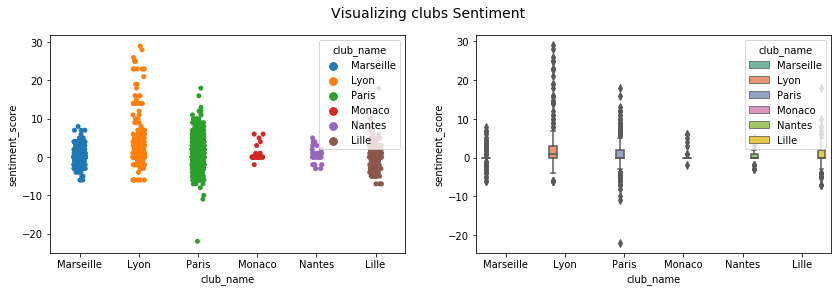

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='club_name', y="sentiment_score", 
                   hue='club_name', data=df, ax=ax1)
bp = sns.boxplot(x='club_name', y="sentiment_score", 
                 hue='club_name', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing clubs Sentiment', fontsize=14)

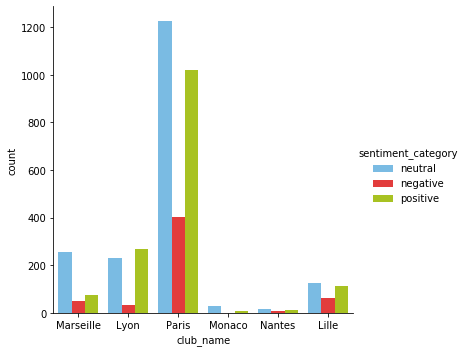

In [170]:
fc = sns.factorplot(x="club_name", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [171]:
pos_idx = df[(df.club_name=='Nantes') & (df.sentiment_score == 5)].index[0]
neg_idx = df[(df.club_name=='Paris') & (df.sentiment_score == -10)].index[0]

print('Most Negative Tweet regarding Paris:', all_tweet.iloc[neg_idx][['tweet_full_text']][0])
print()
print('Most Positive Tweet regarding Paris:', all_tweet.iloc[pos_idx][['tweet_full_text']][0])

Most Negative Tweet regarding Paris: #psg is a chaotic team #france is a chaotic country #paris is a chaotic city hell on earth https://tco/tubcnoogub

Most Positive Tweet regarding Paris: also i pay my respects and offer my sincerest condolences to the family and friends of emiliano sala on what would've been his 30th birthday today

he holds an important place at fc nantes and it must be a day of immense sadness for all who knew him

rip emiliano ❤

#fcnantes


# Building word clouds for each club

In [172]:
from nltk.corpus import stopwords

# Here I add languages that I think are common
stop_words = stopwords.words(['english', 'french', 'dutch', 'spanish', 'german', 'russian', 'italian'])

## Here we add additional  stopwords
stop_words.extend(['tco','visiblement', 'rt','meme','memesdaily','dailymeme','dankmeme','dankmemes','funny','nsol31','funnymemes','http','https','petit_cheval','fait',' '])


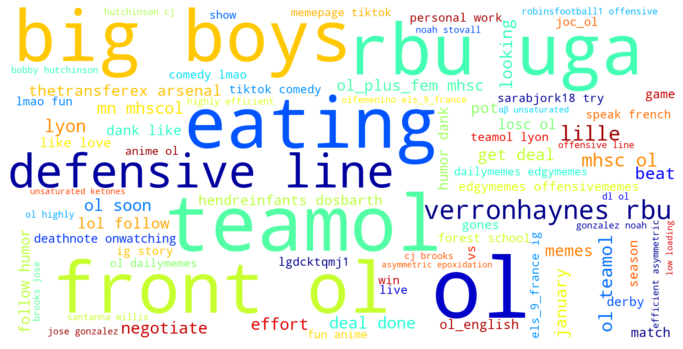

In [173]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def word_cloud(wd_list):
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweet_ol['tweet_full_text'])

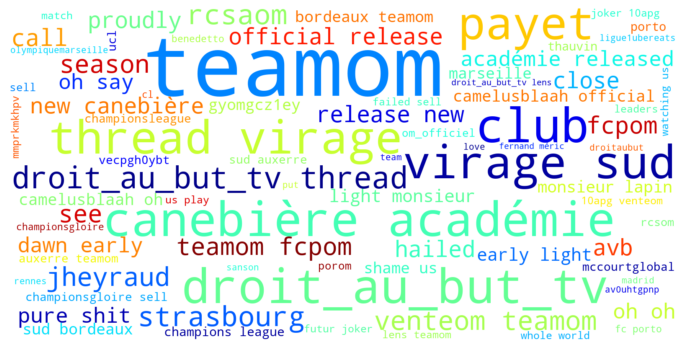

In [174]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def word_cloud(wd_list):
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweet_om['tweet_full_text'])

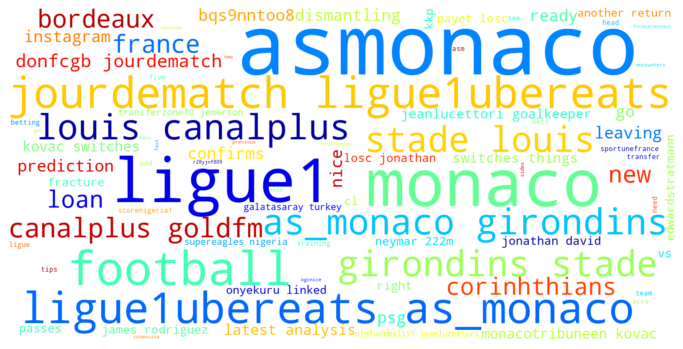

In [175]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def word_cloud(wd_list):
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweet_asm['tweet_full_text'])

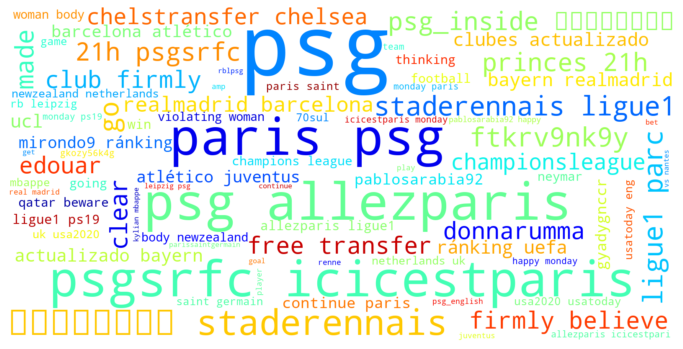

In [176]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def word_cloud(wd_list):
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweet_psg['tweet_full_text'])

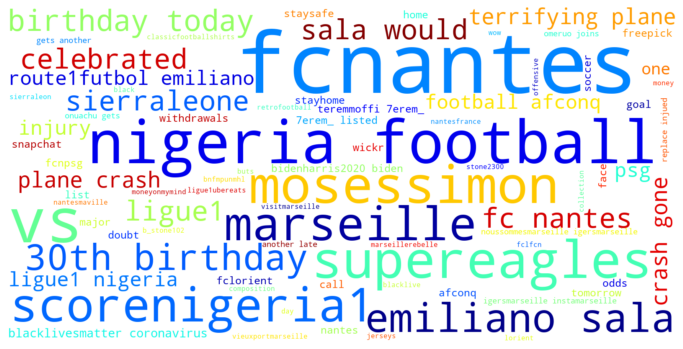

In [177]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def word_cloud(wd_list):
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweet_nantes['tweet_full_text'])

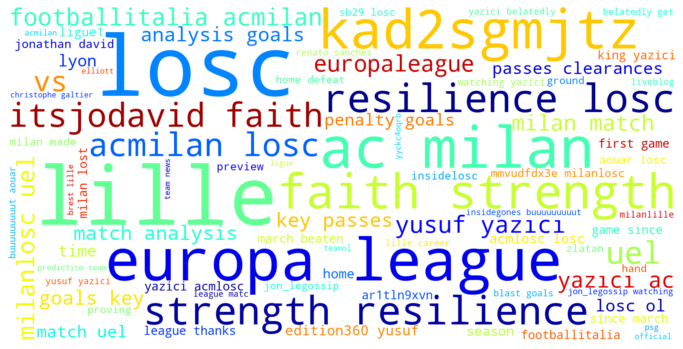

In [178]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def word_cloud(wd_list):
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweet_losc['tweet_full_text'])